# Feed-Forward NN

In [1]:
# MNIST
# DataLoader, Transformaiton
# Multilayer Neural Net, activation function
# Loss Optimizer
# Training Loop (batch training)
# Model evaluation



torch.Size([100, 1, 28, 28]) torch.Size([100])


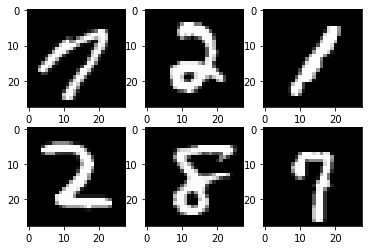

In [20]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transorms
import matplotlib.pyplot as plt


# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
# 10 different classes
num_classes = 10 

# training epochs
num_epochs = 4
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transorms.ToTensor(),
                                          download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transorms.ToTensor())

# dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size,
                                          shuffle=False) 
# shuffle false b/c doesn't matter for eval

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [21]:
# setting up a fully connected NN with one hidden layer

class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) # first layer
        self.relu = nn.ReLU() # activation layer
        self.l2 = nn.Linear(hidden_size, num_classes) # second layer
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) # no soft max here
        return out

# model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss() # this will apply the soft max, which is why it was not needed earlier
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    # loop over batches
    for i, (images, labels) in enumerate(train_loader):
        # reshape images first from 100, 1, 28, 28 ->
        # input size = 784 
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step() # update step, updating parameters
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')
            
# testing loop and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    # loop over batches in test samples
    for images, labels in test_loader:
        # reshape
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index -> returned by torch.max
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] # gives the number of samples in current batch
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1 / 4, step 100 / 600, loss = 0.4444
epoch 1 / 4, step 200 / 600, loss = 0.4386
epoch 1 / 4, step 300 / 600, loss = 0.3127
epoch 1 / 4, step 400 / 600, loss = 0.3467
epoch 1 / 4, step 500 / 600, loss = 0.2963
epoch 1 / 4, step 600 / 600, loss = 0.2318
epoch 2 / 4, step 100 / 600, loss = 0.2094
epoch 2 / 4, step 200 / 600, loss = 0.1630
epoch 2 / 4, step 300 / 600, loss = 0.1425
epoch 2 / 4, step 400 / 600, loss = 0.2350
epoch 2 / 4, step 500 / 600, loss = 0.0946
epoch 2 / 4, step 600 / 600, loss = 0.2753
epoch 3 / 4, step 100 / 600, loss = 0.0875
epoch 3 / 4, step 200 / 600, loss = 0.1491
epoch 3 / 4, step 300 / 600, loss = 0.0548
epoch 3 / 4, step 400 / 600, loss = 0.1770
epoch 3 / 4, step 500 / 600, loss = 0.1405
epoch 3 / 4, step 600 / 600, loss = 0.2037
epoch 4 / 4, step 100 / 600, loss = 0.1719
epoch 4 / 4, step 200 / 600, loss = 0.0822
epoch 4 / 4, step 300 / 600, loss = 0.1373
epoch 4 / 4, step 400 / 600, loss = 0.2038
epoch 4 / 4, step 500 / 600, loss = 0.1425
epoch 4 / 4